In [1]:
from dataset import *
from train import *
from UNET import *

c:\ProgramData\Miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
base_path = Path(
    "../input/38-Cloud_training"
)
dataset = CloudDastaset(
    base_path / "train_red",
    base_path / "train_green",
    base_path / "train_blue",
    base_path / "train_nir",
    base_path / "train_gt",
)
print("dataset has a length of: ", len(dataset))

dataset has a length of:  8400


In [33]:

# trypath = Path('../input/38-Cloud_training/train_green/green_patch_1_1_by_1_LC08_L1TP_002053_20160520_20170324_01_T1.TIF')

# a = np.array(Image.open(trypath))
# ex = np.stack([a,a,a], axis = 2)
# ex.shape

(384, 384, 3)

In [39]:
x, y = dataset[1000]
x.shape, y. shape

(torch.Size([4, 384, 384]), torch.Size([384, 384]))

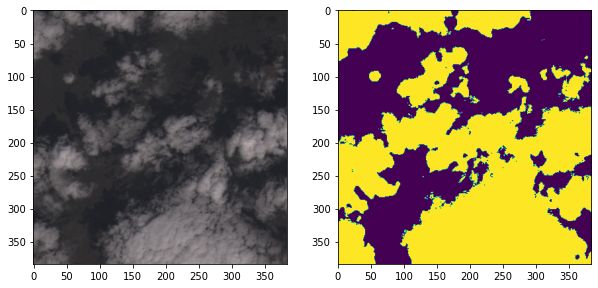

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10,9))
ax[0].imshow(dataset.open_as_array(25))
ax[1].imshow(dataset.open_mask(25))


In [48]:
unet = UNET(4, 2)
unet.load_state_dict(torch.load('../unet_weights/unet.pt'))
unet.eval()

FileNotFoundError: [Errno 2] No such file or directory: '../unet_weights/unet.pt'

In [41]:
train_val_size = (int(len(dataset) * 7 / 10)), int(len(dataset) * 3 / 10)
train_ds, valid_ds = torch.utils.data.random_split(dataset, train_val_size)
train_dl = DataLoader(train_ds, batch_size=12, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=12, shuffle=True)

In [45]:
xb, yb = next(iter(train_dl))

with torch.no_grad():
    predb = unet(xb)

predb.shape, xb.shape, yb.shape

(3, 384, 384)

In [46]:
def batch_to_img(xb, idx):
    img = np.array(xb[idx,0:3])
    return img.transpose((1,2,0))

def predb_to_mask(predb, idx):
    p = torch.functional.F.softmax(predb[idx], 0)
    return p.argmax(0).cpu()

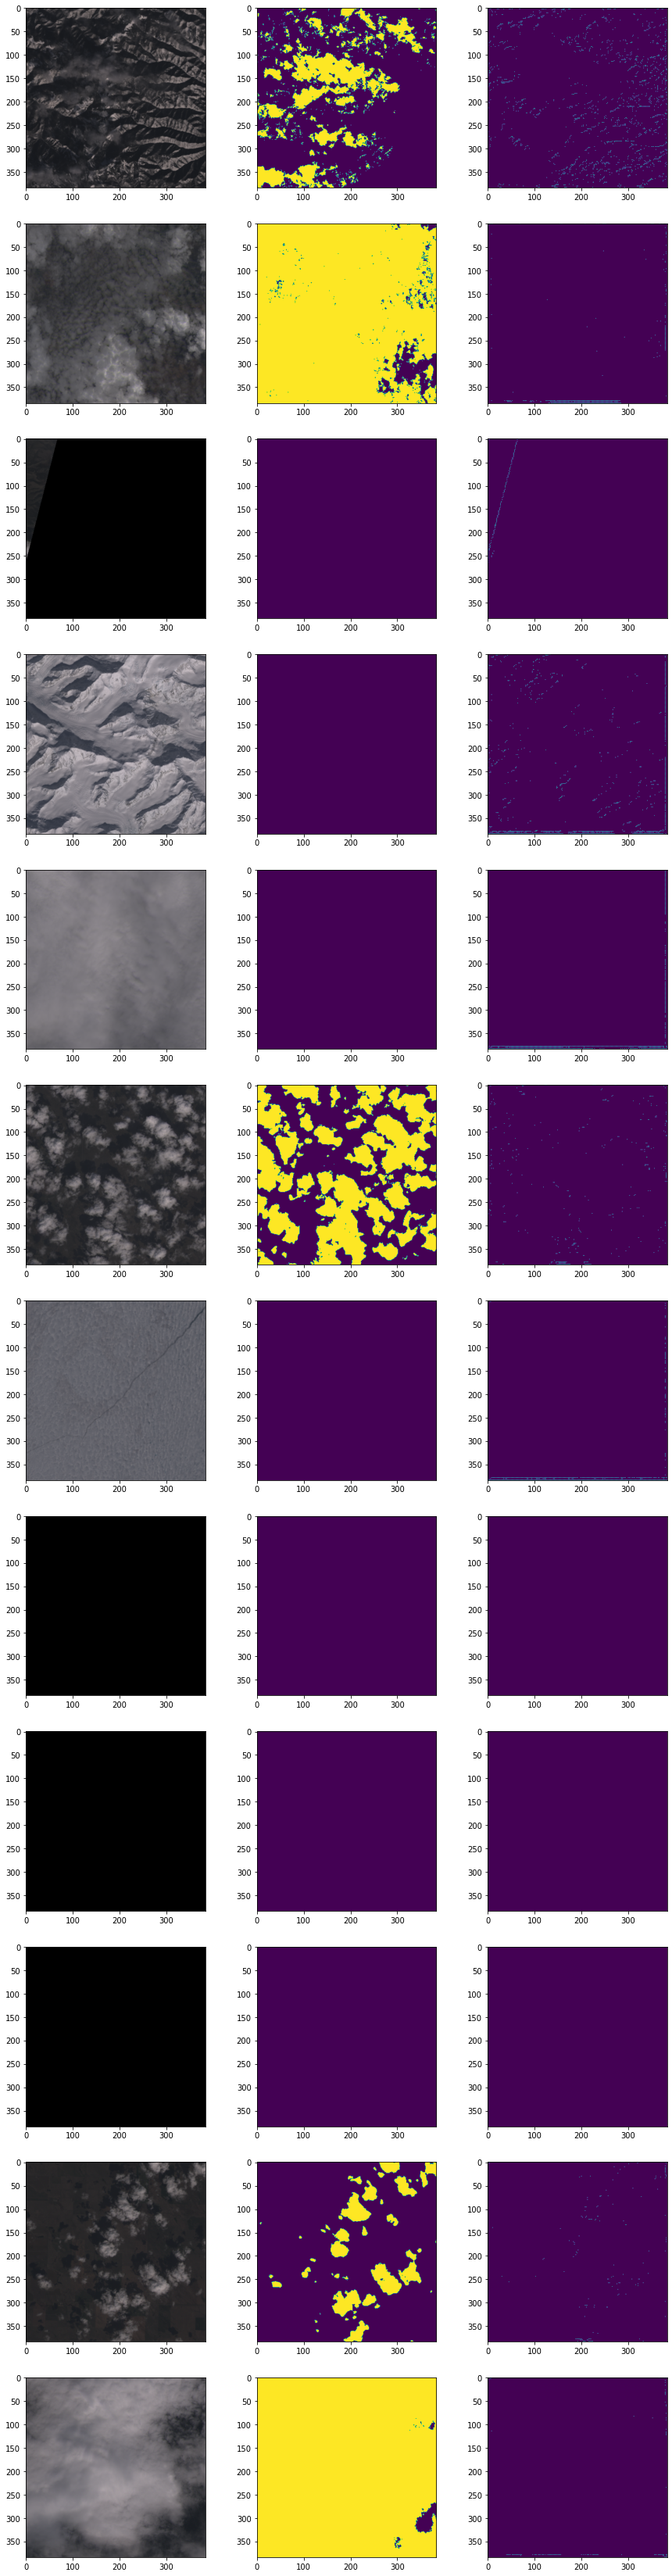

In [47]:
bs = 12
fig, ax = plt.subplots(bs,3, figsize=(15,bs*5))
for i in range(bs):
    ax[i,0].imshow(batch_to_img(xb,i))
    ax[i,1].imshow(yb[i])
    ax[i,2].imshow(predb_to_mask(predb, i))